In [42]:
#!/usr/bin/env python

In [1]:
from __future__ import print_function

import sys
sys.version

import argparse
import csv
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import keras
    
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

from keras import backend as K
from keras.models import load_model

from keras.callbacks import EarlyStopping
from keras.callbacks import History 

from keras.datasets import cifar10

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import rmsprop
from keras.optimizers import SGD

from PIL import Image

from random import shuffle, sample

import skimage.data
from sklearn.model_selection import train_test_split

import os

from keras_sequential_ascii import sequential_model_to_ascii_printout

import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys

sys.stdout.flush()

import convnet_image_utils
from importlib import reload
reload(convnet_image_utils)
from convnet_image_utils import ProjectX

# Allow image embeding in notebook
%matplotlib inline

Using TensorFlow backend.


In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--modeldir', '-d')
parser.add_argument('--imagefile', '-f')
parser.add_argument('--learningrate', '-l', default=1e-6)
parser.add_argument('--opt', '-o')

_StoreAction(option_strings=['--opt', '-o'], dest='opt', nargs=None, const=None, default=None, type=None, choices=None, help=None, metavar=None)

In [ ]:
#... 4.0%
# transfer_learning_union_InceptionResNetV2-Adam-5794-224x224-111

#... 2.5%
# transfer_learning_union_InceptionV3-Adam-5794-224x224-111

#... 1.0%
# transfer_learning_union_ResNet50-Adam-5794-224x224-111

#... 61.0%
# transfer_learning_union_VGG16-Adam-5794-224x224-111

#... 36.2%
# transfer_learning_union_VGG19-Adam-5794-224x224-111

#... 3.9%
# transfer_learning_union_Xception-Adam-5794-224x224-111

In [34]:
try:
    get_ipython().__class__.__name__
    args = parser.parse_args(['-d', 'transfer_learning_union_Xception-Adam-5794-224x224-111',
                             ]
                            )
    in_jupyter = True
    print('In Jupyter...')
except:
    args = parser.parse_args()
    in_jupyter = False
    print('NOT in Jupyter...')

model_dir  = args.modeldir
image_file = args.imagefile
validation_dir = '/home/joeantol/joeantolwork/project-x/data/union/gunks/trapps/trainval/validation'
batch_size = 32

In Jupyter...


In [35]:
X = ProjectX()
model_stats = X.load_the_model(model_dir)

hist = model_stats['hist']
model = model_stats['model']
image_width = model_stats['image_width']
image_height = model_stats['image_height']
label_map = model_stats['label_map']

# label_map = (vg.class_indices)
# label_map = {v: k for k, v in label_map.items()}

Loaded trained model from /home/joeantol/joeantolwork/project-x/saved_models/transfer_learning_union_Xception-Adam-5794-224x224-111 
Loaded evals...
Loaded history...
Loaded pred...
Loaded times...
Loaded label_map...


In [ ]:
# clear_devices=True
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [36]:
model_stats['eval']

[3.7661393711132876, 0.038826574633304571]

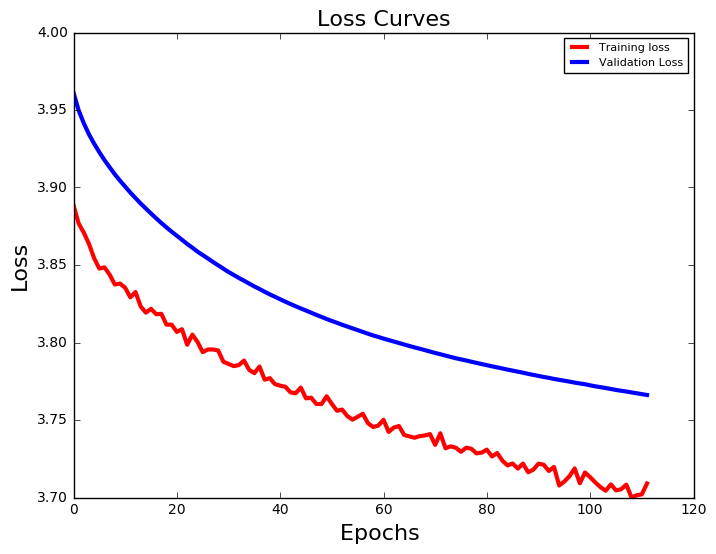

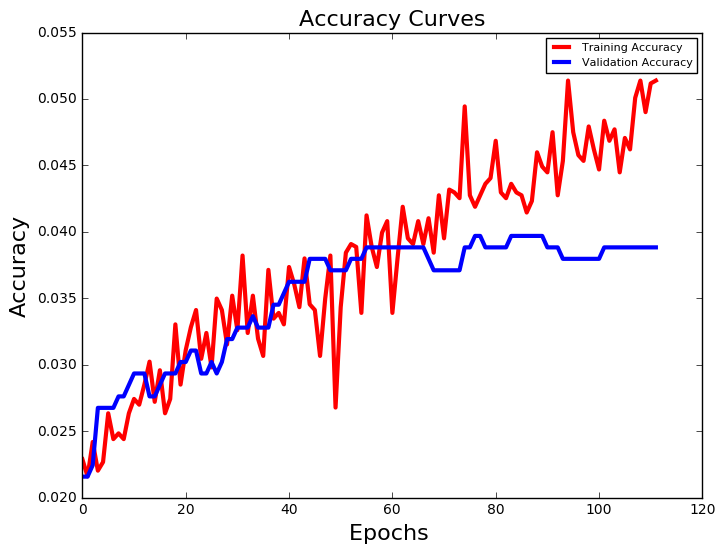

In [37]:
if in_jupyter:

    #... Plot the Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(hist['loss'],'r',linewidth=3.0)
    plt.plot(hist['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=8)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(hist['acc'],'r',linewidth=3.0)
    plt.plot(hist['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=8)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

#     sequential_model_to_ascii_printout(model)

In [51]:
batch_size = 1

dg = ImageDataGenerator()
vg = dg.flow_from_directory(
        validation_dir,
        target_size=(image_width, image_height),
        batch_size=batch_size,
        class_mode='categorical',
        follow_links=True
)

label_map = (vg.class_indices)
label_map = {v: k for k, v in label_map.items()}

Found 4632 images belonging to 47 classes.


In [ ]:
# cwd = os.getcwd()
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_path = os.path.join(save_dir, model_dir)

# #... Load model and weights
# model = load_model(os.path.join(model_path, 'model.h5'))
# print('Loaded trained model from %s ' % model_path)

image_dir = '/home/joeantol/work/project-x/data/testimages/gunks/trapps'
# image_file = os.path.join(image_dir, 'missbailey_20180310_152947_020.jpg')
image_file = os.path.join(image_dir, 'missbailey-1.jpg')
gtruth = image_file.split('/')[-2]

image = Image.open(image_file).convert("RGB").resize((image_width, image_height))
# image = Image.open(image_file).convert("RGB").rotate(-90).resize((image_width, image_height))

img = np.array(image)
# img = img * 1./255.
img = X.normalize(img)

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

npimages = np.array([[r] + [g] + [b]], np.float32)

npimages = npimages.transpose(0,2,3,1)

# classes = model.predict_classes(npimages)
prediction = model.predict(npimages, verbose=2)

# print(label_map[classes[0]], gtruth)

prediction, label_map[prediction.argmax()], plt.imshow(image)

In [52]:
#... Use with 'testimages' (aka still photos taken with Android)
# image = Image.open(image_file).convert("RGB").rotate(-90).resize((width, height))
# full_image = Image.open(image_file).convert("RGB").rotate(-90)

#... Use with images scraped from video (either GoPro or Android)
# image = Image.open(image_file).convert("RGB").resize((image_width, image_height))
# image = Image.open(image_file).resize((width, height))

num_correct = num_wrong = 0

filenames = vg.filenames
filenames = sample(filenames, 100)

for f in filenames:
    gtruth = f.split('/')[0]
    image_file = os.path.join(validation_dir, f)
    image = Image.open(image_file).convert("RGB").resize((image_width, image_height))

    img = np.array(image)
#     img = img * 1./255.
    img = X.normalize(img)

    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    npimages = np.array([[r] + [g] + [b]], np.float32)
    npimages = npimages.transpose(0,2,3,1)

#     classes = model.predict_classes(npimages)
    prediction = model.predict(npimages, verbose=2)
    
#     pred_label = classes[0]
    pred_label = label_map[prediction.argmax()]
    
    if pred_label == gtruth:
        num_correct += 1
        print('Correct: ' + pred_label + ' == ' + gtruth + ' ' + f)
    else:
        num_wrong += 1
        print('Wrong: ' + pred_label + ' != ' + gtruth + ' ' + f)

print ('Right = ' + str(num_correct/(num_correct+num_wrong)*100.0) + '\n' +
       'Wrong = ' + str(num_wrong/(num_correct+num_wrong)*100.0))

Wrong: classic != p38 p38/p38_20180310_145912_027.jpg
Wrong: herdiegerdieblock != splashtic splashtic/splashtic_20180505_131044_007.jpg
Wrong: apecall != mariadirect mariadirect/mariadirect_20180310_154223_017.jpg
Wrong: pinklaurel != bellyroll bellyroll/bellyroll-gopro-0000000369.jpg
Wrong: herdiegerdieblock != pinklaurel pinklaurel/pinklaurel_20180310_151008_011.jpg
Wrong: herdiegerdieblock != doubleclutch doubleclutch/doubleclutch_20180310_142439_015.jpg
Wrong: doublechin != dirtychimney dirtychimney/dirtychimney_20180310_142754_007.jpg
Wrong: classic != raubenheimerspecial raubenheimerspecial/raubenheimerspecial-gopro-0000000286.jpg
Wrong: herdiegerdieblock != apoplexy apoplexy/apoplexy_20180310_142702_015.jpg
Wrong: herdiegerdieblock != rmc rmc/rmc_20180310_151410_021.jpg
Wrong: herdiegerdieblock != rmc rmc/rmc_20180310_151353_015.jpg
Wrong: gorillamydreams != doubleclutch doubleclutch/doubleclutch_20180310_142454_017.jpg
Wrong: herdiegerdieblock != bellyroll bellyroll/bellyroll_2

In [ ]:
label_map[prediction.argmax()], gtruth